### `chat_id ` из Телеграма:

In [10]:
# chat_id = 720721680

------------------

##  <ins>Задание 1.</ins>

### 0. Запосить у бота в Телеграме условие командой `/get_project1_desc`.

# Шаблон для проекта по A/B - тестам.

### 1. Необходимо выбрать метрику и привести аргументацию.

In [2]:
# По условию:
# "Мы много платим оператору из-за того,
# что он сам по каждому заданию
# звонит клиенту и ждёт ответа клиента.
# Мы хотим попробовать снизить затраты на операторов,
# внедрив систему,
# которая будет сама звонить человеку
# и в случае успеха перенаправлять задание оператору"

# В качестве метрики можно выбрать среднее значение NPV, поскольку оно сильно коррелирует с расходами.
# Если нам удастатся уменьшить расходы на дозвон, то среднее значение NPV должно вырасти. 
# В этом случае можно внедрять систему с автоматическим дозвоном.

In [7]:
import pandas as pd

df = pd.read_csv('C:\\Users\\delux\\Desktop\\data\\hist_telesales.csv')

df.describe()

,ID,Флаг дозвона,Флаг продажи,Расходы,PV,NPV
count,72161.000000,72161.000000,72161.000000,72161.000000,72161.000000,72161.000000
mean,36080.000000,0.599881,0.302172,200.581547,482.041352,281.459805
std,20831.230725,0.489926,0.459202,363.748786,814.227243,677.664908
min,0.000000,0.000000,0.000000,0.000000,0.000000,-4406.000000
25%,18040.000000,0.000000,0.000000,21.000000,0.000000,-54.000000
50%,36080.000000,1.000000,0.000000,59.000000,0.000000,-18.000000
75%,54120.000000,1.000000,1.000000,182.000000,1258.000000,535.000000
max,72160.000000,1.000000,1.000000,6280.000000,41255.000000,41144.000000


### 2. Альтернатива в критерии.

In [1]:
# Выдвигая гипотезу H0: p = p0, я говорю о том, что внедрение автоматической системы дозвона не повлияет на среднее NPV.
# Альтернативная гипотеза H1: p > p0. Внедрение автоматической системы дозвона уменьшит расход на оператора, 
#     тем самым увеличивается среднее значение NPV.

### 3.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

In [ ]:
# По условию uplift = 5%, a = 0.05, b = 0.9
# тогда MDE = 0.05 * среднее NPV

In [8]:
MDE = 0.05 * df.NPV.mean()
MDE

14.07299025789554

In [9]:
# квантили

from scipy import stats


a = stats.norm.ppf(1-0.05)
b = stats.norm.ppf(1-0.9)
print(a,b)

1.6448536269514722 -1.2815515655446004


In [10]:
#Определяю размер выборки по формуле:

N = (2 * df.NPV.var() * ((a + b) ** 2)) / (MDE ** 2)
N.round()

612.0

### 3.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project1_sample {размер выборки}` и вписать <ins>код выборки</ins>:

In [ ]:
36012

### 4. Принятие решения. Расписать подробно с аргументами.

In [29]:
x = pd.read_csv('C:\\Users\\delux\\Desktop\\data\\Контроль.csv')
x = x.NPV
y = pd.read_csv('C:\\Users\\delux\\Desktop\\data\\Тест.csv')
y = y.NPV

In [12]:
from scipy.stats import ttest_ind 
p = ttest_ind(x, y, equal_var=False, alternative='less')
p

Ttest_indResult(statistic=-1.6599254732357038, pvalue=0.048600060300617164)

In [3]:
# Вывод:
#     pvalue = 0.0486 меньше, чем a = 0.05. Это означает, что мы отклоняем H0 в пользу H1 и считаем, что мы
# получили статзначимый аплифт. Таким образом внедрение автоматической системы дозвона позволит увеличить среднее NPV.

------------------

##  <ins>Задание 2.</ins>

### 0. Запосить у бота в Телеграме условие командой `/get_project2_desc`.

### 1. Необходимо выбрать метрику и привести аргументацию.

In [4]:
# В соотсветствии с заданием:
#     "Контекст
# ЦБ смягчило правило,
# ограничивающее варианты продажи услуги.
# Мы хотим попробовать
# более агрессивную продажу услуги,
# но боимся,
# что это повлияет на экономику основного продукта (КК)
# из-за негатива клиентов.

# Тест
# Мы проводим тест,
# в рамках которого мы разбиваем весь поток
# на две части рановероятно,
# где одной части (контролю) 
# мы будем предлагать услугу текущим способом,
# а второй части (тесту) 
# - новым более агрессивным способом.
# Целью этого теста 
# является увеличение доходности КК + услуги."



# Целевой метрикой будет являться флаг утилизации счета. Потому что значения PV КК и PV услуги напрямую зависят от Флага утилизации счета.

In [13]:
import pandas as pd

df_1 = pd.read_csv('C:\\Users\\delux\\Desktop\\data\\hist_credit_card.csv')

df_1.describe()

,ID,Возраст,Доход клиента,Вероятность банкротства,Флаг утилизации счёта,Расходы,PV КК,PV услуги,NPV
count,123255.000000,123255.000000,1.232550e+05,1.232550e+05,123255.000000,123255.000000,1.232550e+05,123255.000000,1.232550e+05
mean,61627.000000,39.673522,3.009385e+04,1.254254e-01,0.741544,421.941942,7.496049e+03,1486.105253,8.560212e+03
std,35580.798052,16.449416,1.748776e+04,1.105042e-01,0.437788,486.166550,2.158962e+04,1357.035726,2.175863e+04
min,0.000000,18.000000,2.000019e+04,5.004337e-08,0.000000,0.000000,0.000000e+00,0.000000,-5.100000e+02
25%,30813.500000,25.000000,2.201773e+04,4.053515e-02,0.000000,74.000000,0.000000e+00,0.000000,-1.000000e+00
50%,61627.000000,36.000000,2.523474e+04,9.475862e-02,1.000000,252.000000,6.316000e+03,1518.000000,7.755000e+03
75%,92440.500000,52.000000,3.183823e+04,1.801795e-01,1.000000,600.000000,8.807000e+03,1916.000000,1.044800e+04
max,123254.000000,75.000000,1.187963e+06,8.601029e-01,1.000000,5178.000000,5.073883e+06,75058.000000,5.075041e+06


### 2. Альтернатива в критерии.

In [5]:
# Выдвигая гипотезу H0: p = p0, я говорю о том, что в результате внедрения более агрессивной стратегии продажи продукта, 
#     количество утилизированных счетов не изменится.
# Альтернативная гипотеза H1: p <> p0. Более агрессивная стратегия продажи продукта, 
#     повлияет на количество утилизированных счетов, но не известно в какую сторону. 
#     (Двухсторонняя альтернатива)

### 3. Нужно выбрать параметр(-ы), влияющий(-ие) на целевую метрику. Привести аргументацию.

<AxesSubplot:>

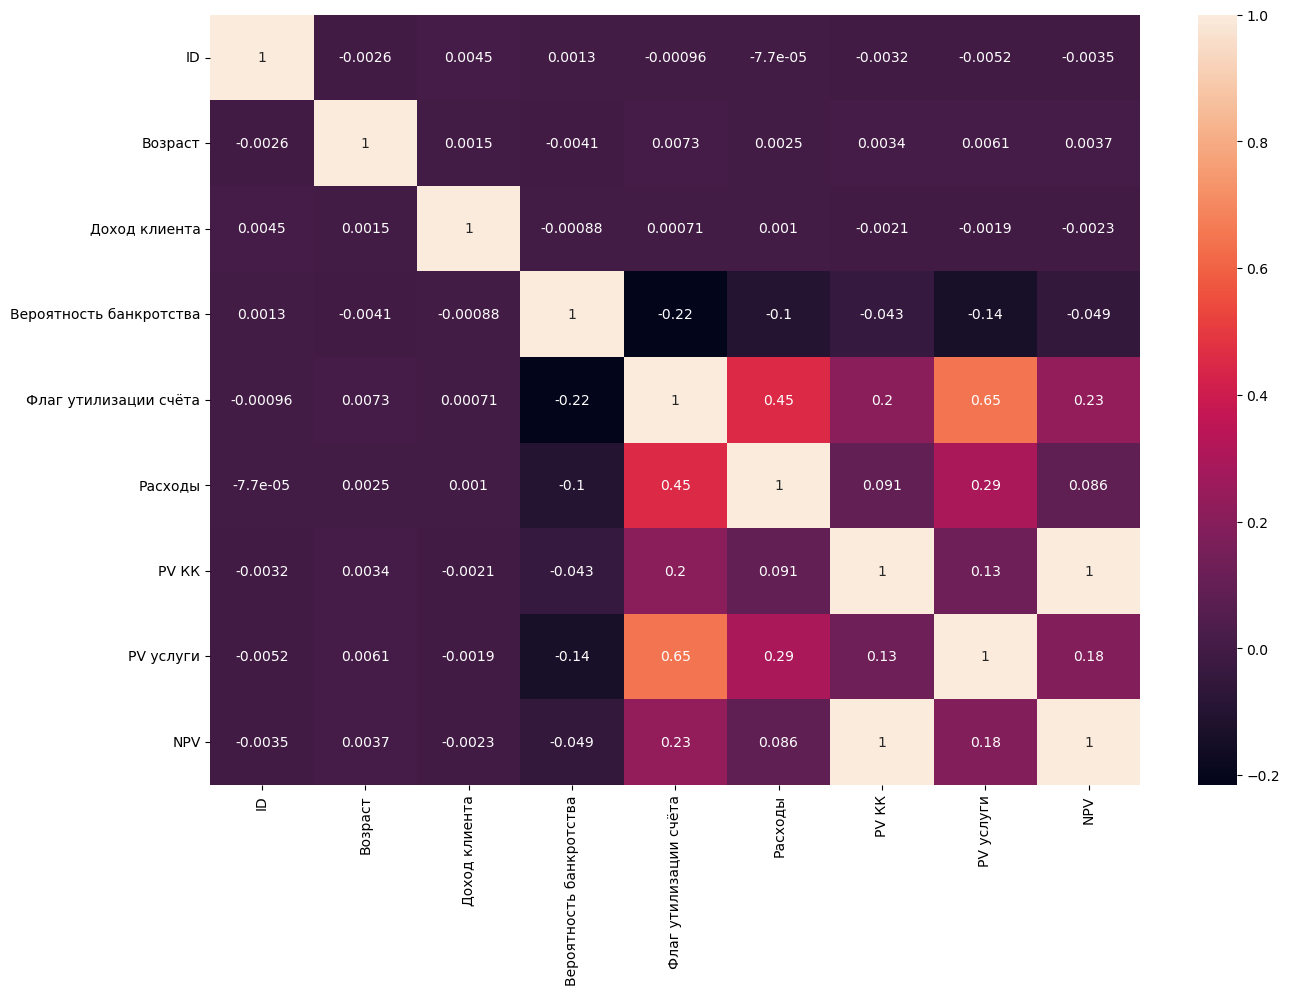

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df_1.corr(method='pearson', min_periods=1),annot=True)

In [6]:
# Как видно по таблице коррреляции признаков, параметр Флаг утилизации счета коррелирует с вероятностью банкроства.

### 4.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

In [16]:
p = df_1['Флаг утилизации счёта'].mean()
MDE = 0.03 * df_1['Флаг утилизации счёта'].mean()
a_1 = stats.norm.ppf(1-0.05/2)
b_1 = stats.norm.ppf(1-0.85)


N = (2 * p * (1 - p) * (a_1 + b_1) ** 2 ) / ( MDE ** 2 )
N.round()

661.0

### 4.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project2_sample {размер выборки}` и вписать <ins>код выборки</ins>:

In [ ]:
26893

### 5. Проверка на однородность, применение критерия. Принятие решения. Расписать подробно с аргументами.

In [63]:
a_v = pd.read_csv('C:\\Users\\delux\\Desktop\\data\\Контроль1.csv')
a_v = a_v['Вероятность банкротства']
b_v = pd.read_csv('C:\\Users\\delux\\Desktop\\data\\Тест1.csv')
b_v = b_v['Вероятность банкротства']


In [66]:
from scipy.stats import ks_2samp
# Проверка на однородность:

p = ks_2samp(a_v,b_v)
p

KstestResult(statistic=0.048411497730711045, pvalue=0.4210398921613382)

In [8]:
# Выборки однородны. (pvalue > 0.05) 

In [60]:
a_c = pd.read_csv('C:\\Users\\delux\\Desktop\\data\\Контроль1.csv')
a_c = a_c['Флаг утилизации счёта']
b_t = pd.read_csv('C:\\Users\\delux\\Desktop\\data\\Тест1.csv')
b_t = b_t['Флаг утилизации счёта']

In [61]:
from scipy.stats import ttest_ind 
p = ttest_ind(a_c, b_t, equal_var=False, alternative='two-sided')
p

Ttest_indResult(statistic=0.6965289692300446, pvalue=0.4862203128357231)

In [9]:
# Вывод:
#     pvalue = 0.486 больше, чем a = 0.05. Это означает, что у нас нет достаточных оснований отклонить H0.
#     Таким образом можно говорить о том, что
#     в результате внедрения более агрессивной стратегии продажи продукта, количество утилизированных счетов не изменится.